# Project: Investigate Gapminder Employment Datasets 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

Countries tend to develop their market value of all final goods and services produced in their country over years, this metric known as GDP. Usually, as GDP changes over time, it has a huge impact on the employment stats like rate, status, sector and etc. 
This investigation tends to explore metrics from Gapminder datasets related to GDP and employment by status. We have used an extra dataset containing countries region and subregion data. the dataset can be downloaded from its own <a href="https://github.com/lukes/ISO-3166-Countries-with-Regional-Codes">GitHub repository</a>.

Questions directing this investigation are:

- As time passes how GDP changes over time?
- As time passes, how employment status changes over time?
- Which regions have faster progression in terms of GDP? 
- Which employment status is more common in countries with higher GDP?


Datasets used:
- Gross Domestic Product per capita in constant USD, Purchasing power parity (value from the year 2010)
    - Adjusted for inflation (constant USD)
    - Adjusted for differences in cost of living between countries (PPP)
- Salaried workers (% total labor force)
- Family workers (% total labor force)
- Self employed (% total labor force)

In [170]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

First of all, we will get a glimpse of our datasets.

In [171]:
# Import data
df_country = pd.read_csv('data/country_regions.csv', index_col = False)
df_family = pd.read_csv('data/family_workers.csv', index_col = False)
df_salary = pd.read_csv('data/salaried_employee.csv', index_col = False)
df_self = pd.read_csv('data/self_employed.csv', index_col = False)
df_GDP = pd.read_csv('data/gdp_per_capita_ppp.csv', index_col = False)

In [172]:
df_country.head()

,name,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,region-code,sub-region-code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,142.0,34.0
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,150.0,154.0
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,150.0,39.0
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,2.0,15.0
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,9.0,61.0


In [173]:
df_family.head(10)

,country,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007
0,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,8.4,NaN,7.2,8.2,NaN,NaN,NaN
1,American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Anguilla,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN
3,Antigua and Barbuda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Argentina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.3,1.4,1.2,1.1,1.1,1.7,1.4,1.200000,1.1,NaN
5,Armenia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Australia,0.4,0.4,0.4,0.4,0.3,0.4,0.8,0.9,0.9,...,0.7,0.8,0.8,0.5,0.5,0.4,0.4,0.300000,0.3,0.3
8,Austria,NaN,NaN,NaN,NaN,NaN,4.4,4.4,4.5,4.3,...,2.9,2.7,2.5,2.4,2.3,2.1,1.0,1.400000,1.5,2.4
9,Azerbaijan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,18.6,18.6,16.799999,0.0,0.0


In [174]:
df_salary.head()

,country,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007
0,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,60.900002,NaN,64.800003,59.799999,NaN,NaN,NaN
1,American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Anguilla,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,77.000000,NaN,64.599998,NaN,NaN,NaN,NaN,NaN,NaN
3,Antigua and Barbuda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Argentina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,72.099998,72.400002,72.300003,71.800003,71.599998,73.599998,74.099998,74.5,75.800003,NaN


In [175]:
df_self.head()

,country,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007
0,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,29.299999,NaN,27.799999,31.700001,NaN,NaN,NaN
1,American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Anguilla,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,13.700000,NaN,19.000000,NaN,NaN,NaN,NaN,NaN,NaN
3,Antigua and Barbuda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Argentina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,26.5,26.200001,26.4,27.100000,27.200001,24.600000,24.500000,24.299999,23.1,NaN


In [176]:
df_GDP.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,603.0,603.0,603.0,603.0,603.0,603.0,603.0,603.0,603.0,...,1173.0,1298.0,1311.0,1548.0,1637.0,1695.0,1893.0,1884.0,1877.0,1925.0
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,667.0,667.0,668.0,668.0,668.0,668.0,668.0,668.0,668.0,...,7476.0,7977.0,8644.0,8994.0,9374.0,9640.0,9811.0,9961.0,10160.0,10620.0
4,Algeria,716.0,716.0,717.0,718.0,719.0,720.0,721.0,722.0,723.0,...,12088.0,12289.0,12314.0,12285.0,12494.0,12606.0,12779.0,12893.0,13179.0,13434.0


As you see, there is a lot of missing (NaN) values even in "heads" of these datasets. this could be to the hardship of collecting data in a not developed country. as these missing values are a lot and it goes more than half for some countries we cannot replace it with mean or something else, we will remove countries with more than 40% NaN value. thus this report could have a better information for developed countries.

Beside NaN values in Gapminder datasets, there are extra information columns in country regions dataset that will not be going to use, so we will drop them too.

In [177]:
# Drop columns from df_ccode which will not be used
df_country.drop(['alpha-2','alpha-3' ,'country-code', 'iso_3166-2', 'region-code',
               'sub-region-code'], axis=1, inplace=True)
df_country.head()

,name,region,sub-region
0,Afghanistan,Asia,Southern Asia
1,Åland Islands,Europe,Northern Europe
2,Albania,Europe,Southern Europe
3,Algeria,Africa,Northern Africa
4,American Samoa,Oceania,Polynesia


GDP data frames has information for many years before 1980 and a few after 2007 that are not presented in other dataframes, so we will drop these unused coloumns too.

In [178]:
df_GDP = df_GDP.iloc[:, np.r_[0:1, 181:len(df_GDP.columns)- 8]]
df_GDP.head()

,country,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1158.0,1284.0,1402.0,1454.0,1429.0,1384.0,1486.0,1230.0,1113.0,...,947.0,972.0,962.0,862.0,1053.0,1097.0,1067.0,1146.0,1173.0,1298.0
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,4218.0,4227.0,4237.0,4248.0,4259.0,4267.0,4281.0,4294.0,4307.0,...,4434.0,4912.0,5305.0,5730.0,5913.0,6274.0,6672.0,7075.0,7476.0,7977.0
4,Algeria,10166.0,10160.0,10477.0,10696.0,10947.0,11030.0,10722.0,10378.0,9888.0,...,9646.0,9810.0,9885.0,10203.0,10634.0,11251.0,11575.0,12077.0,12088.0,12289.0


In [179]:
df_list = ["df_GDP", "df_self", "df_salary", "df_family"]

### Cleaning NaN Values

Before removing countries with lots of NaN values, we will see how these values are dispersed over years.

In [180]:
def NaN_density_plot(dataset, name):
    """
    Calculate density for not_NaN values and plot them
    """
    x_label = "Year"
    y_label = "Not-NaN Density"
    year = []
    density = []
    for i in range(1, dataset.shape[1]):
        year.append(int(dataset.columns[i]))
        density.append(dataset.iloc[:, i].count()/len(dataset.iloc[:, i]))
    
    plt.plot(year, density)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(f"Not-NaN values for {name}")
    #axes = plt.gca()
    #axes.set_ylim([0, 1])
    plt.show()

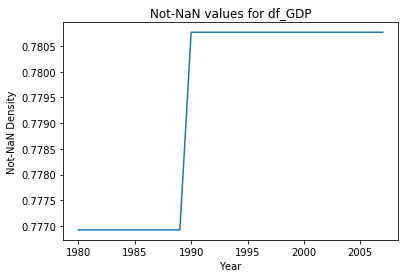

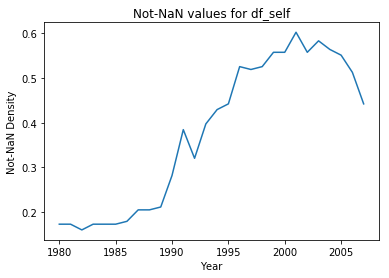

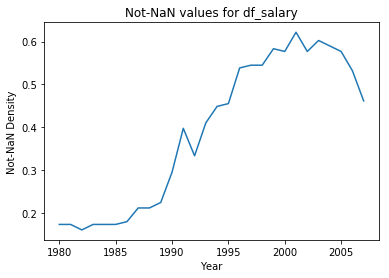

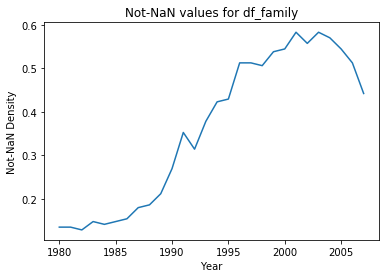

In [181]:
for df in df_list:
    NaN_density_plot(eval(df), df)

All the datasets have somehow the same routine except GDP dataset, as we can see not-NaN values increase over time until 2000 that there is a slight drop in every next year.

Now we are going find countries with lots of NaN values to remove them from our datasets.

In [182]:
def NaN_Density_DataSet(df_list):
    
    # Initialize values
    n_countries = {}
    smallest = 100000 #a high number
    
    # Find dataframes with lowest number of nonNaN rows
    for df in df_list:
        if not eval(df).shape[0] in n_countries.keys():
            n_countries[eval(df).shape[0]]=[df]
        else:
            n_countries[eval(df).shape[0]].append(df)
            
        if eval(df).shape[0] < smallest: 
            smallest = eval(df).shape[0]
    
    if len(n_countries[smallest]) > 1:
        smallest_list = n_countries[smallest]
        check_country = common_countries(smallest_list)
    
    else: 
        check_country =  list(eval(n_countries[smallest][0])['country'])
    
    check_df_country = country_check(check_country, df_country)
    check_countries = country_check(check_df_country, df_GDP)    
    
    # Create dictionary which will be converted to dataframe
    dict_to_df = {}
    
    for country in check_countries:
        row_list = [] 
        
        for df in df_list:
            df_row_length = eval(df)[eval(df)['country']==country].iloc[0, 1:].notnull().count()
            df_row_notNaN = eval(df)[eval(df)['country']==country].iloc[0, 1:].notnull().sum()
            
            row_list.append(df_row_notNaN/df_row_length)
        
        dict_to_df[country] = row_list
        
    # Convert dictionary to dataframe and transpose
    return_df = pd.DataFrame(dict_to_df)
    return_df.insert(loc = 0, column = 'country', value = df_list)
    return_df = return_df.transpose()
    return_df.columns = return_df.iloc[0]
    new_df = return_df.reindex(return_df.index.drop('country'))
    
    return new_df    


def common_countries(smallest_list):
    """
    Checks countries which are not found in all dataframes.
    """

    ignore_country = []
    check_country= []

    for i in range(len(smallest_list)):
        
        j = i
        while j < len(smallest_list):
            set_diff = set(eval(smallest_list[i])['country']).difference(
                       set(eval(smallest_list[j])['country']))
            
            for k in set_diff:
                if k not in ignore_country:
                    ignore_country.append(k)
            
            j+=1
        
    # find check_columns
    for df in smallest_list:
        c_set = set(eval(df).country)
        ignore_set = set(ignore_country)
        diff = c_set.difference(ignore_set)
        good_columns = list(diff)
        for col in good_columns:
            if col not in check_country:
                check_country.append(col)
    
    return check_country

def country_check(check_country, df):
    """
    Check countries that are in the df
    """
    
    checked_countries = []

    for country in check_country:
        try: 
            if country in list(df['name']):
                checked_countries.append(country)
        except KeyError: 
            if country in list(df['country']): 
                checked_countries.append(country)
    
    return checked_countries    

In [183]:
# Calculate Not-NaN density for each country
df_NaN_Density = NaN_Density_DataSet(df_list)

# Fix indexing issues
df_NaN_Density.reset_index(inplace=True)
df_NaN_Density.rename({'index': 'country'}, axis=1, inplace=True)

df_NaN_Density.head()

country,country,df_GDP,df_self,df_salary,df_family
0,Algeria,1,0.107143,0.107143,0.107143
1,American Samoa,0,0.0357143,0.0357143,0.0357143
2,Anguilla,0,0.0714286,0.0714286,0.0357143
3,Antigua and Barbuda,1,0.0357143,0.0357143,0.0357143
4,Argentina,1,0.607143,0.607143,0.392857


Now we can use our threshold to remove countries with low data.

In [184]:
threshold = 0.60
countries_60 = df_NaN_Density[(df_NaN_Density['df_GDP'] > threshold) &\
                        (df_NaN_Density['df_self'] > threshold) &\
                        (df_NaN_Density['df_salary'] > threshold) &\
                        (df_NaN_Density['df_family'] > threshold)]


# Join with df_country
df_country.rename({'name': 'country'}, axis=1, inplace=True)
countries_60 = df_country.merge(right = countries_60, how='inner', on='country')

# Define countries to investigate
country_list = list(countries_60['country'])

countries_60.head()

,country,region,sub-region,df_GDP,df_self,df_salary,df_family
0,Australia,Oceania,Australia and New Zealand,1,1,1,1
1,Austria,Europe,Western Europe,1,1,1,0.821429
2,Belgium,Europe,Western Europe,1,0.785714,0.785714,0.785714
3,Canada,Americas,Northern America,1,1,1,1
4,Costa Rica,Americas,Central America,1,1,1,0.75


In [185]:
countries_60.groupby('region')['country'].count()

region
Americas     8
Asia         4
Europe      18
Oceania      2
Name: country, dtype: int64

As we see, all of africa countries due to lack of data have been removed.

In [186]:
# Update dataframes in df_List to contain the relevant countries
df_GDP = df_GDP[df_GDP['country'].isin(country_list)]
df_self = df_self[df_self['country'].isin(country_list)]
df_salary = df_salary[df_salary['country'].isin(country_list)]
df_family = df_family[df_family['country'].isin(country_list)]

In [187]:
#Now we should fill NaN value in datasets
def fill_na(df):
    """
    Fill missing values for each column by using mean
    """
        
    for i in range(df.shape[0]):
        row_mean = df.iloc[i, 1:].mean()
        df.iloc[i]=df.iloc[i].fillna(row_mean)
        
    return df

In [188]:
df_GDP = fill_na(df_GDP)
df_self = fill_na(df_self)
df_salary = fill_na(df_salary)
df_family = fill_na(df_family)

Now it's time to check that we have no NaN value.

In [189]:
df_GDP.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32 entries, 13 to 232
Data columns (total 29 columns):
country    32 non-null object
1980       32 non-null float64
1981       32 non-null float64
1982       32 non-null float64
1983       32 non-null float64
1984       32 non-null float64
1985       32 non-null float64
1986       32 non-null float64
1987       32 non-null float64
1988       32 non-null float64
1989       32 non-null float64
1990       32 non-null float64
1991       32 non-null float64
1992       32 non-null float64
1993       32 non-null float64
1994       32 non-null float64
1995       32 non-null float64
1996       32 non-null float64
1997       32 non-null float64
1998       32 non-null float64
1999       32 non-null float64
2000       32 non-null float64
2001       32 non-null float64
2002       32 non-null float64
2003       32 non-null float64
2004       32 non-null float64
2005       32 non-null float64
2006       32 non-null float64
2007       32 non-null float

In [190]:
df_salary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32 entries, 7 to 142
Data columns (total 29 columns):
country    32 non-null object
1980       32 non-null float64
1981       32 non-null float64
1982       32 non-null float64
1983       32 non-null float64
1984       32 non-null float64
1985       32 non-null float64
1986       32 non-null float64
1987       32 non-null float64
1988       32 non-null float64
1989       32 non-null float64
1990       32 non-null float64
1991       32 non-null float64
1992       32 non-null float64
1993       32 non-null float64
1994       32 non-null float64
1995       32 non-null float64
1996       32 non-null float64
1997       32 non-null float64
1998       32 non-null float64
1999       32 non-null float64
2000       32 non-null float64
2001       32 non-null float64
2002       32 non-null float64
2003       32 non-null float64
2004       32 non-null float64
2005       32 non-null float64
2006       32 non-null float64
2007       32 non-null float6

In [191]:
df_family.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32 entries, 7 to 142
Data columns (total 29 columns):
country    32 non-null object
1980       32 non-null float64
1981       32 non-null float64
1982       32 non-null float64
1983       32 non-null float64
1984       32 non-null float64
1985       32 non-null float64
1986       32 non-null float64
1987       32 non-null float64
1988       32 non-null float64
1989       32 non-null float64
1990       32 non-null float64
1991       32 non-null float64
1992       32 non-null float64
1993       32 non-null float64
1994       32 non-null float64
1995       32 non-null float64
1996       32 non-null float64
1997       32 non-null float64
1998       32 non-null float64
1999       32 non-null float64
2000       32 non-null float64
2001       32 non-null float64
2002       32 non-null float64
2003       32 non-null float64
2004       32 non-null float64
2005       32 non-null float64
2006       32 non-null float64
2007       32 non-null float6

In [192]:
df_self.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32 entries, 7 to 142
Data columns (total 29 columns):
country    32 non-null object
1980       32 non-null float64
1981       32 non-null float64
1982       32 non-null float64
1983       32 non-null float64
1984       32 non-null float64
1985       32 non-null float64
1986       32 non-null float64
1987       32 non-null float64
1988       32 non-null float64
1989       32 non-null float64
1990       32 non-null float64
1991       32 non-null float64
1992       32 non-null float64
1993       32 non-null float64
1994       32 non-null float64
1995       32 non-null float64
1996       32 non-null float64
1997       32 non-null float64
1998       32 non-null float64
1999       32 non-null float64
2000       32 non-null float64
2001       32 non-null float64
2002       32 non-null float64
2003       32 non-null float64
2004       32 non-null float64
2005       32 non-null float64
2006       32 non-null float64
2007       32 non-null float6

Now we are going to change percentage in data frames from 100 range to 1 range for easy calculations.

In [193]:
df_self.iloc[:, 1:] = df_self.iloc[:, 1:].divide(other=100)
df_salary.iloc[:, 1:] = df_salary.iloc[:, 1:].divide(other=100)
df_family.iloc[:, 1:] = df_family.iloc[:, 1:].divide(other=100)

In [194]:
# merging regions and sub regions into dataframes
df_GDP = df_country.merge(right = df_GDP, how='inner', on='country')
df_self = df_country.merge(right = df_self, how='inner', on='country')
df_salary = df_country.merge(right = df_salary, how='inner', on='country')
df_family= df_country.merge(right = df_family, how='inner', on='country')

Now DataFrames are ready for data analysis

In [195]:
df_self.head()

,country,region,sub-region,1980,1981,1982,1983,1984,1985,1986,...,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007
0,Australia,Oceania,Australia and New Zealand,0.162,0.155,0.157,0.156,0.158,0.154,0.151,...,0.139,0.137,0.133000,0.132000,0.134000,0.130000,0.128000,0.126,0.122,0.118000
1,Austria,Europe,Western Europe,0.171,0.167,0.160,0.160,0.153,0.105,0.104,...,0.107,0.106,0.104000,0.107000,0.107000,0.106000,0.117000,0.118,0.120,0.120000
2,Belgium,Europe,Western Europe,0.132,0.135,0.137,0.141,0.142,0.142,0.143,...,0.149,0.147,0.143227,0.143227,0.143227,0.143227,0.143227,0.135,0.135,0.143227
3,Canada,Americas,Northern America,0.081,0.080,0.086,0.089,0.091,0.097,0.090,...,0.167,0.166,0.158000,0.150000,0.149000,0.151000,0.152000,0.154,0.150,0.154000
4,Costa Rica,Americas,Central America,0.196,0.185,0.185,0.190,0.195,0.199,0.193,...,0.258,0.261,0.267000,0.283000,0.286000,0.279000,0.289000,0.263,0.271,0.251000


In [196]:
df_family.head()

,country,region,sub-region,1980,1981,1982,1983,1984,1985,1986,...,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007
0,Australia,Oceania,Australia and New Zealand,0.004000,0.004000,0.004000,0.004000,0.003000,0.004,0.008,...,0.007,0.008,0.008000,0.005000,0.005000,0.004000,0.004000,0.003,0.003,0.003000
1,Austria,Europe,Western Europe,0.030043,0.030043,0.030043,0.030043,0.030043,0.044,0.044,...,0.029,0.027,0.025000,0.024000,0.023000,0.021000,0.010000,0.014,0.015,0.024000
2,Belgium,Europe,Western Europe,0.034000,0.035000,0.036000,0.037000,0.038000,0.038,0.038,...,0.034,0.032,0.035091,0.035091,0.035091,0.035091,0.035091,0.017,0.015,0.035091
3,Canada,Americas,Northern America,0.010000,0.011000,0.011000,0.010000,0.009000,0.010,0.008,...,0.004,0.003,0.003000,0.002000,0.002000,0.002000,0.002000,0.002,0.002,0.002000
4,Costa Rica,Americas,Central America,0.034000,0.034000,0.034000,0.034000,0.034000,0.034,0.034,...,0.033,0.030,0.026000,0.029000,0.031000,0.026000,0.024000,0.023,0.022,0.018000


In [197]:
df_salary.head()

,country,region,sub-region,1980,1981,1982,1983,1984,1985,1986,...,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007
0,Australia,Oceania,Australia and New Zealand,0.835,0.841,0.839,0.840,0.839,0.842,0.840,...,0.854,0.855,0.859000,0.862000,0.861000,0.866000,0.868000,0.871,0.875,0.880000
1,Austria,Europe,Western Europe,0.829,0.833,0.840,0.840,0.847,0.851,0.852,...,0.864,0.867,0.870000,0.869000,0.870000,0.874000,0.872000,0.867,0.865,0.857000
2,Belgium,Europe,Western Europe,0.834,0.830,0.827,0.822,0.820,0.820,0.819,...,0.818,0.821,0.821636,0.821636,0.821636,0.821636,0.821636,0.848,0.849,0.821636
3,Canada,Americas,Northern America,0.909,0.910,0.904,0.901,0.900,0.893,0.902,...,0.829,0.831,0.839000,0.848000,0.849000,0.847000,0.846000,0.845,0.848,0.845000
4,Costa Rica,Americas,Central America,0.753,0.754,0.743,0.743,0.760,0.742,0.752,...,0.709,0.710,0.708000,0.688000,0.683000,0.695000,0.688000,0.714,0.707,0.730000


In [198]:
df_GDP.head()

,country,region,sub-region,1980,1981,1982,1983,1984,1985,1986,...,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007
0,Australia,Oceania,Australia and New Zealand,23872.0,24308.0,23884.0,23584.0,24934.0,25875.0,26057.0,...,33085.0,34346.0,35253.0,35452.0,36375.0,37035.0,38130.0,38840.0,39416.0,40643.0
1,Austria,Europe,Western Europe,25259.0,25187.0,25637.0,26435.0,26522.0,27100.0,27707.0,...,36157.0,37382.0,38548.0,38919.0,39370.0,39475.0,40292.0,40875.0,42036.0,43418.0
2,Belgium,Europe,Western Europe,25847.0,25517.0,25873.0,25879.0,26527.0,26792.0,27189.0,...,34992.0,36209.0,37404.0,37620.0,38036.0,38214.0,39356.0,39881.0,40661.0,41575.0
3,Canada,Americas,Northern America,26678.0,27171.0,26031.0,26525.0,27781.0,29016.0,29482.0,...,34389.0,35810.0,37314.0,37563.0,38270.0,38621.0,39436.0,40284.0,41012.0,41432.0
4,Costa Rica,Americas,Central America,7537.0,7190.0,6508.0,6505.0,6820.0,6683.0,6851.0,...,9095.0,9610.0,9564.0,9465.0,9548.0,9972.0,10212.0,10629.0,11371.0,12079.0


<a id='eda'></a>
## Exploratory Data Analysis

Now we are going to answer questions we posted earlier:
- As time passes how GDP changes over time?
- As time passes, how employment status changes over time?
- Which regions have faster progression in terms of GDP? (as we have lost a lot of countries, any answer to this question could be so biased)
- Which employment status is more common in countries with higher GDP?



In [199]:
def line_plotter(x_series, y_series, x_label = "x", y_label="y", plt_title = "plot", color="red"):
    """
    Create a basic line plot, you need to call plt.show() after using this function
    """
    
    # Change years to int
    x_series = x_series.astype(int)
     
    plt.plot(x_series, y_series, c=color)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(plt_title)

### As time passes how GDP changes over time?

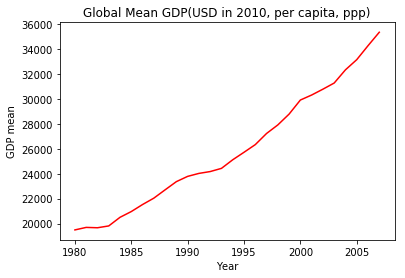

In [200]:
line_plotter(x_series=df_GDP.columns[3:], 
           y_series=df_GDP.mean(), 
           x_label= "Year",
           y_label= 'GDP mean',
           plt_title='Global Mean GDP(USD in 2010, per capita, ppp)')
plt.show()

As it was assumed earlier, as time passes GDP rises over time.

### As time passes, how employment status changes over time?

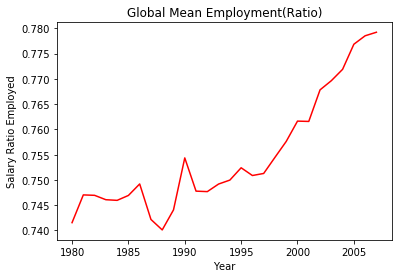

In [201]:
line_plotter(x_series=df_salary.columns[3:], 
           y_series=df_salary.mean(), 
           x_label= "Year",
           y_label= 'Salary Ratio Employed',
           plt_title='Global Mean Employment(Ratio)')
plt.show()

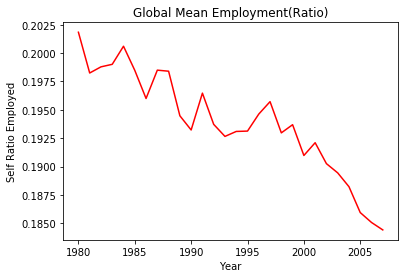

In [202]:
line_plotter(x_series=df_self.columns[3:], 
           y_series=df_self.mean(), 
           x_label= "Year",
           y_label= 'Self Ratio Employed',
           plt_title='Global Mean Employment(Ratio)')
plt.show()

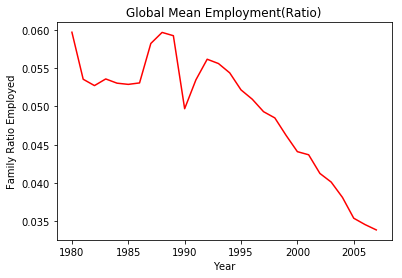

In [203]:
line_plotter(x_series=df_family.columns[3:], 
           y_series=df_family.mean(), 
           x_label= "Year",
           y_label= 'Family Ratio Employed',
           plt_title='Global Mean Employment(Ratio)')
plt.show()

As we see in above charts, salary employment has the greatest share by about 75 percent and it is still rising its share from 74 percent in 1980 to 78 percent in 2007. The other two employment status has lost their shares to salary employment. self-employment has lost about 1.5 percent, however these data are until 2007 (more than a decade ago), I think in the last decade self-employment has got more attention, we see more freelancer in web design, programming, writers and etc but without having data for these years, these are just some unapproved guess. at last, we have family-workers, its share has been cut to half which I think is a true statement and is still descending because in past people tend to work with their fathers and pursue and continue their family works.

### Which regions have faster progression in terms of GDP?

Text(0,0.5,'GDP')

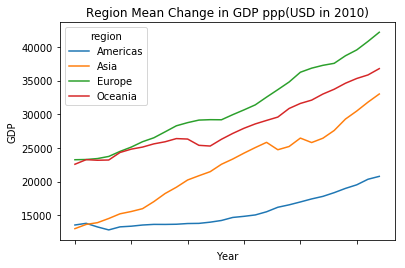

In [206]:
ax = df_GDP.groupby('region').mean().T.plot(title='Region Mean Change in GDP ppp(USD in 2010)');
ax.set_xlabel('Year')
ax.set_ylabel('GDP')

We can see how much each region has progressed in terms of purchasing power parity GDP. however, we should consider that there are only 2 countries representing Oceania and only 4 countries representing Asia. with this explanation, we see Asia has the most progression over these years followed by Europe.

#### We can have a similar comparison between subregions in a region:

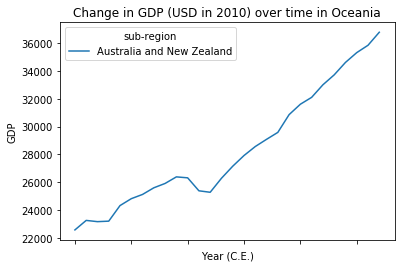

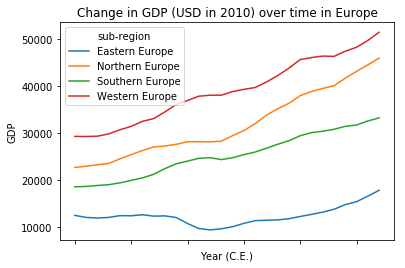

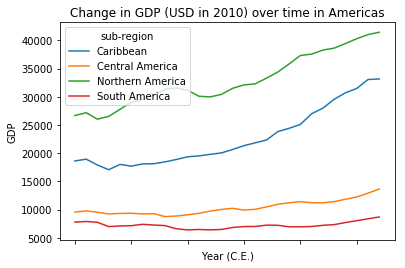

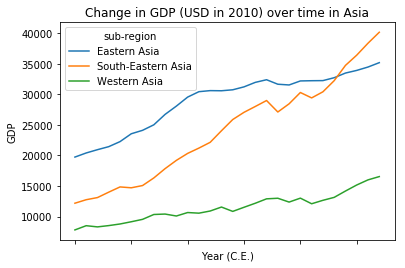

In [213]:
for region in df_GDP['region'].unique():
    ax = df_GDP[df_GDP['region'] == region].groupby(
            'sub-region').mean().T.plot(title=f'Change in GDP (USD in 2010) over time in {region}')
    ax.set_xlabel('Year (C.E.)')
    ax.set_ylabel('GDP')

Here we can see how each subregion has impacted on its region GDP growth. for example in America region growth is due to the northern America and Caribbean growth. Or in Europe, we could see that the western part has the most growth while the eastern has the least and likewise in Asia, we see a significant growth in south-eastern countries and a small progress in western Asia countries.

### Which employment status is more common in countries with higher GDP?

As we have used the PPP version of GDP, we could compare countries to each other. Now we are going to see employment status of countries int the top 25 percent GDP.
First of all, we are going to add a mean column to GDP data set for each country and then find top eight mean country and filter other data sets by these selected countries.

In [222]:
df_GDP['mean'] = df_GDP.iloc[:,3:].mean(axis=1)
df_GDP.head()

,country,region,sub-region,1980,1981,1982,1983,1984,1985,1986,...,1999,2000,2001,2002,2003,2004,2005,2006,2007,mean
0,Australia,Oceania,Australia and New Zealand,23872.0,24308.0,23884.0,23584.0,24934.0,25875.0,26057.0,...,34346.0,35253.0,35452.0,36375.0,37035.0,38130.0,38840.0,39416.0,40643.0,30743.607143
1,Austria,Europe,Western Europe,25259.0,25187.0,25637.0,26435.0,26522.0,27100.0,27707.0,...,37382.0,38548.0,38919.0,39370.0,39475.0,40292.0,40875.0,42036.0,43418.0,33206.678571
2,Belgium,Europe,Western Europe,25847.0,25517.0,25873.0,25879.0,26527.0,26792.0,27189.0,...,36209.0,37404.0,37620.0,38036.0,38214.0,39356.0,39881.0,40661.0,41575.0,32561.178571
3,Canada,Americas,Northern America,26678.0,27171.0,26031.0,26525.0,27781.0,29016.0,29482.0,...,35810.0,37314.0,37563.0,38270.0,38621.0,39436.0,40284.0,41012.0,41432.0,32888.178571
4,Costa Rica,Americas,Central America,7537.0,7190.0,6508.0,6505.0,6820.0,6683.0,6851.0,...,9610.0,9564.0,9465.0,9548.0,9972.0,10212.0,10629.0,11371.0,12079.0,8408.107143


In [233]:
top_country = list(df_GDP.nlargest(8,'mean')['country'])
top_country

['Luxembourg',
 'Norway',
 'Switzerland',
 'Singapore',
 'Denmark',
 'Netherlands',
 'Germany',
 'Austria']

In [240]:
top_self = df_self[df_self['country'].isin(top_country)]
top_sala = df_salary[df_salary['country'].isin(top_country)]
top_fami = df_family[df_family['country'].isin(top_country)]

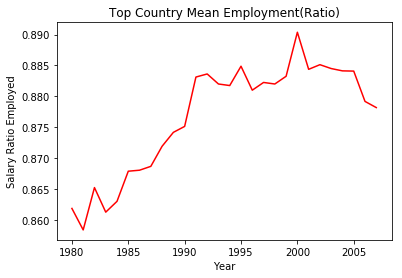

In [244]:
line_plotter(x_series=top_sala.columns[3:], 
           y_series=top_sala.mean(), 
           x_label= "Year",
           y_label= 'Salary Ratio Employed',
           plt_title='Top Country Mean Employment(Ratio)')
plt.show()

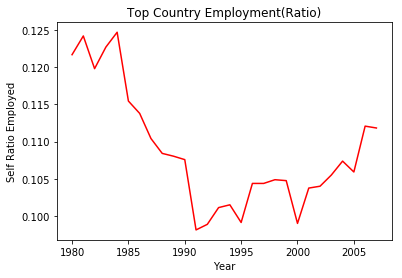

In [245]:
line_plotter(x_series=top_self.columns[3:], 
           y_series=top_self.mean(), 
           x_label= "Year",
           y_label= 'Self Ratio Employed',
           plt_title='Top Country Employment(Ratio)')
plt.show()

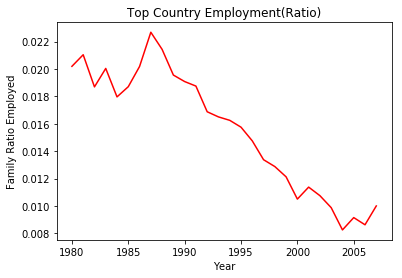

In [246]:
line_plotter(x_series=top_fami.columns[3:], 
           y_series=top_fami.mean(), 
           x_label= "Year",
           y_label= 'Family Ratio Employed',
           plt_title='Top Country Employment(Ratio)')
plt.show()

As we can see, in the top eight countries there are slightly same trends in salaried workers and self-employed in the first decade of the report but it changes its trends to a rise in self-employed vs a shortage in salaried workers. we predicted a rise in self-employed vs salary worker for years after 2007 in the previous section, we can see this trend has occurred many years before in top GDP countries.
We see almost no change in the family worker section as it is descending like the global while it has a more significant descend in the top GDP countries.

<a id='conclusions'></a>
## Conclusions

- We saw that countries tend to rise in GDP, this could be due to technological development or many other factors, however this causation cannot be firguring out based these data.
    - Countries with higher GDP tends more toward self employment in the recent years, however other countries have got more self employment worker (in percentage) comparing to top GDP countries.
    - Countries with higher GDP tends less toward to family working employment.
- People are less interested in family working employment comparing to previous years.
- Western-Europe and south-eastern countries have the most progression in terms of GDP considering purchasing power parity
    

It is good to consider that our analysis does not contain the last decade (2008 - 2018) data and these trends could be changed dramatically. another important note to consider while reading and making a conclusion is that we had to remove many countries due to lack of data, thus, our analysis shows nothing about poorer countries that there are not enough data about them.